In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [12]:
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [15]:
class IrisMLP(nn.Module):
    def __init__(self):
        super(IrisMLP, self).__init__()
        self.hidden = nn.Linear(4, 10)
        self.relu = nn.ReLU()
        self.output = nn.Linear(10, 3)

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

model = IrisMLP()

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [17]:
epochs = 101
train_losses = []
train_accuracies = []

for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Accuracy
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_train_tensor).float().mean().item()

    train_losses.append(loss.item())
    train_accuracies.append(accuracy)

In [18]:
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, test_preds = torch.max(test_outputs, 1)
    test_accuracy = (test_preds == y_test_tensor).float().mean().item()

print(f"Training Accuracy: {train_accuracies[-1]*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

Training Accuracy: 95.83%
Testing Accuracy: 96.67%



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



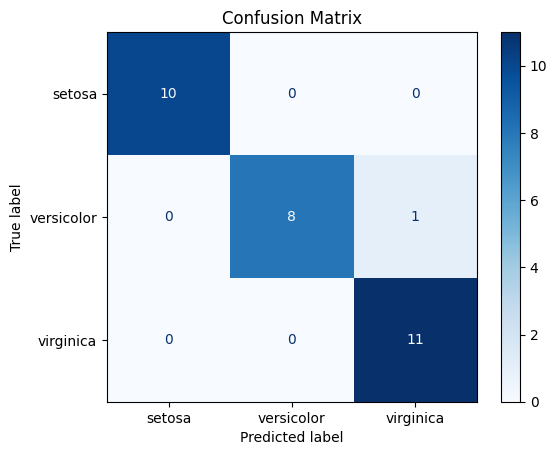

In [19]:
print("\nClassification Report:")
print(classification_report(y_test_tensor, test_preds, target_names=iris.target_names))

cm = confusion_matrix(y_test_tensor, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

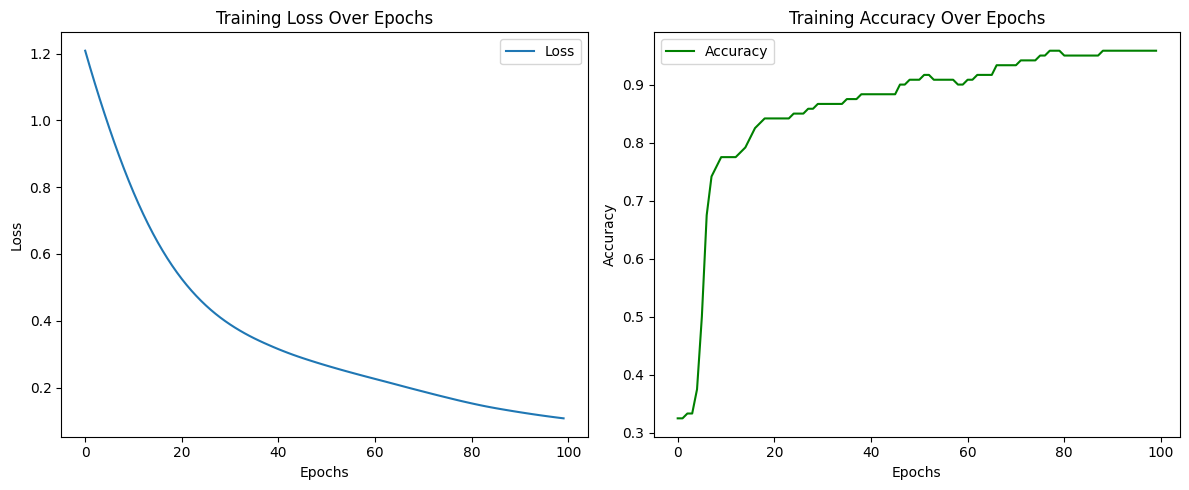

In [20]:
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Accuracy", color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
print(f"Accuracy: [{test_accuracy * 100:.2f}]%")

Accuracy: [96.67]%
